## Variación en la condición de frontera del sistema y sus implicaciones en el estudio epidemiológico

Hasta este momento hemos analizado únicamente sistemas rectangulares, en esta sección estudiaremos las implicaciones que tiene cambiar la frontera de nuestro sistema en la evolución de la enfermedad.

### Variaciones en la condición de frontera del sistema

Al igual que en las implementaciones anteriores, se consideró una vecindad de Moore la cual considera una vecindad de 8 individuos; sin embargo esto no siempre es así. 

En los sistemas rectangulares por ejemplo, los individuos que se encuentran en los bordes del sistema solo cuentan con 5 vecinos y para el caso de los que están ubicados en las esquinas de dichos sistemas, sus vecindades cuentan con tan solo 3 individuos.

Debido a que dos de las reglas que hemos implementado hasta ahora cuentan con una dependencia implícita del comportamiento de la vecindad, debemos realizar un ajuste en cuanto a la cantidad de vecinos con los que cuenta el agente en cuestión.

**Definición 5.1.** Definimos la regla base de interacción local generalizada como:
\begin{equation}
    \phi_{ij}^t(\alpha,\beta)=\left\{
    \begin{array}{cl}
    x_{ij}^{t+1}\in S & \textrm{si }\rho\leq\frac{\beta}{\alpha}\cdot\frac{N_{ij}^t(I)}{8-N_{ij}^t(V)}\textrm{, con }N_{ij}^t(V)\neq8\\
    x_{ij}^{t+1}\in I & \textrm{en otro caso}
    \end{array}
    \right.
\end{equation}
Donde $N_{ij}^t(V)$ representa a la cantidad de espacios vacíos o ausentes (identificados con el color negro) en la vecindad de Moore del agente en la posición $ij$. De manera análoga se define la regla de interacción $SI$ generalizada.

A continuación mostramos una serie de ejemplos que verifican el correcto funcionamiento de la definición 5.1, en cada uno se consideró tanto para el caso del modelo $SIS$ como el caso del modelo $SIR$, una enfermedad con parámetros $\alpha=0.2$ y $\beta=0.5$ en un periodo de 100 días, una ubicación inicial de individuos infectados del tipo aleatorio y una población infectada inicial del $10\%$ con respecto al tamaño de cada sistema, con lo cual obtuvimos los siguientes resultados promedio para 100 simulaciones:

*  **Modelos epidemiológicos sobre una linea:** Se considero un sistema lineal con 10 individuos.
    
En la siguiente figura podemos observar un cambio importante con respecto a la trayectoria de las soluciones, estos cambios se deben a la naturaleza de las vecindades en un sistema de este tipo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from EpidemiologicalModels.DefineSpaceInCA import *
from EpidemiologicalModels.epidemiologicalModels import *

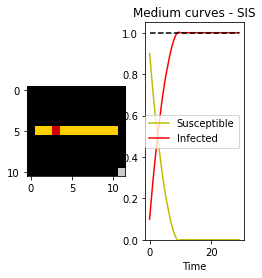

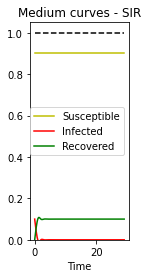

In [2]:
L=-np.ones((9,10))
# L=initialCondition(0.1,rectangularBoundary(1,10,4,0,L))
L = rectangularBoundary(1,10,4,0,L)

msl = models("sis",0.2,0.5,L,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msl[0],msl[1]]; eti_sis = ["Susceptible", "Infected"]; col_sis = ["y", "r"] 
msil = models("sir",0.2,0.5,L,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msil[0],msil[1],msil[2]]; eti_sir = ["Susceptible","Infected","Recovered"]; col_sir = ["y","r","g"] 

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,L)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

*   **Modelos epidemiológicos sobre un cuadrado:** Se consideró un sistema de $10\times10$.

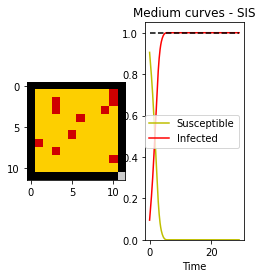

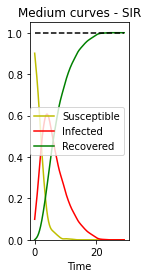

In [3]:
C=np.zeros((10,10))

msl = models("sis",0.2,0.5,C,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msl[0],msl[1]]; eti_sis = ["Susceptible", "Infected"]; col_sis = ["y", "r"] 
msil = models("sir",0.2,0.5,C,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msil[0],msil[1],msil[2]]; eti_sir = ["Susceptible","Infected","Recovered"]; col_sir = ["y","r","g"] 

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,C)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

*   **Modelos epidemiológicos sobre una región rectangular:** En este caso se tomo un sistema $5\times10$.

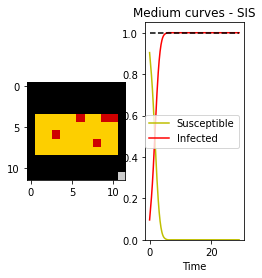

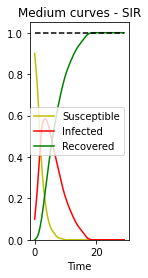

In [4]:
R1=rectangularBoundary(5,10,3,0,-np.ones((10,10)))

msl = models("sis",0.2,0.5,R1,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msl[0],msl[1]]; eti_sis = ["Susceptible", "Infected"]; col_sis = ["y", "r"] 
msil = models("sir",0.2,0.5,R1,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msil[0],msil[1],msil[2]]; eti_sir = ["Susceptible","Infected","Recovered"]; col_sir = ["y","r","g"] 

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,R1)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")
 
plt.show()

*   **Modelos epidemiológicos sobre una región tipo rombo:** Para nuestro cuarto ejemplo tomamos una población de 46 individuos en un sistema tipo rombo.

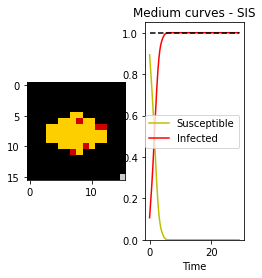

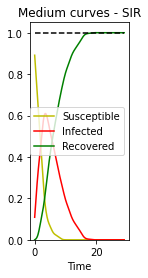

In [5]:
def rombo(a,b,c,d,M):           
    L=[M]
    i=0
    while c>1:
        a=a+2; b=b-4; c=c-1; d=d+2; i=i+1
        L.append(rectangularBoundary(a,b,c,d,L[i-1]))
    return L[i]

R2=-np.ones((14,14))
R2=rombo(1,14,7,0,R2)

eti_sis = ["Susceptible", "Infected"]; col_sis = ["y", "r"]

msr2=models("sis",0.2,0.5,R2,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msr2[0],msr2[1]]
msir2=models("sir",0.2,0.5,R2,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msir2[0],msir2[1],msir2[2]]

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,R2)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

*   **Modelos epidemiológicos en una región triangular:** Se consideró una región triangular con un total de 56 individuos.

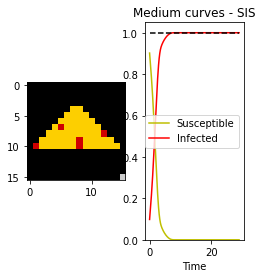

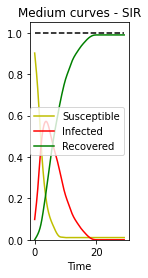

In [6]:
def triangulo(n,m,a,b,M):
    L=[M]
    i=0
    while m>=1:
        i=i+1
        L.append(rectangularBoundary(n,m,a,b,L[i-1]))
        m=m-2; a=a-1; b=b+1
    return L[i]

T=-np.ones((14,14))
T=triangulo(1,14,9,0,T)

mst=models("sis",0.2,0.5,T,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [mst[0],mst[1]]
msit=models("sir",0.2,0.5,T,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msit[0],msit[1],msit[2]]

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,T)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

*   **Modelos epidemiológicos en una región tipo anillo: (caso $\#1$)** Se tomo una población de 48 individuos. Observe que en el caso del modelo $SIR$, la población susceptible no converge a cero como en los ejemplos anteriores, esto se debe a la dificultada que puede tener la propagación de la enfermedad por la manera en la que se definió el sistema.

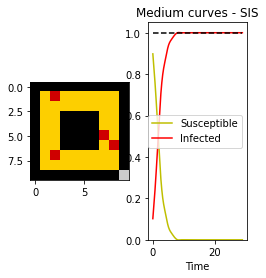

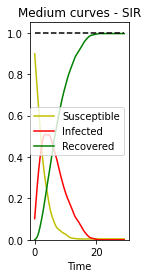

In [7]:
C1 = -np.ones((8,8))
C1 = rectangularBoundary(2,8,0,0,C1)
C1 = rectangularBoundary(8,2,0,0,C1)
C1 = rectangularBoundary(8,2,0,6,C1)
C1 = rectangularBoundary(2,8,6,0,C1)

msc1=models("sis",0.2,0.5,C1,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msc1[0],msc1[1]]
msic1=models("sir",0.2,0.5,C1,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msic1[0],msic1[1],msic1[2]]

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,C1)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

*   **Modelos epidemiológicos en un sistema con población alejada: (caso $\#2$)** Supongamos que tenemos un sistema en el cual cierto grupo de la población no tiene contacto con el resto de los individuos (figura a), este sistema cuenta con una población de 52 individuos. Observe que en ambos modelos, la curva que describe el comportamiento no tiende a cero como en los casos anteriores; esto implica que la enfermedad no alcanza a todos los individuos del sistema, esto debido al distanciamiento con el que cuentan los individuos en el bloque central del sistema.

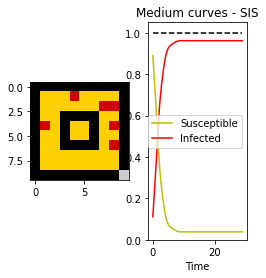

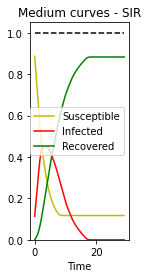

In [8]:
C2=rectangularBoundary(2,2,3,3,C1)

msc2=models("sis",0.2,0.5,C2,Moore).mediumCurves(0.1,30,10)[0]
var_sis = [msc2[0],msc2[1]]
msic2=models("sir",0.2,0.5,C2,Moore).mediumCurves(0.1,30,10)[0]
var_sir = [msic2[0],msic2[1],msic2[2]]

plt.subplot(1,3,1)
plt.imshow(color(initialCondition(0.1,C2)),cmap="nipy_spectral", interpolation='nearest')

plt.subplot(1,3,2)
graficas(var_sis,eti_sis,col_sis,"Medium curves - SIS")

plt.subplot(1,3,3)
graficas(var_sir,eti_sir,col_sir,"Medium curves - SIR")

plt.show()

*Observación:* A diferencia del caso lineal, podemos observar una similitud en cuando al comportamiento de la población infectada en el tiempo. Esto nos sugiere que la manera en la que definimos la condición de frontera del sistema, afecta no solo la velocidad de convergencia sino los valores a los cuales convergen las curvas que describen el comportamiento de las poblaciones en el tiempo.

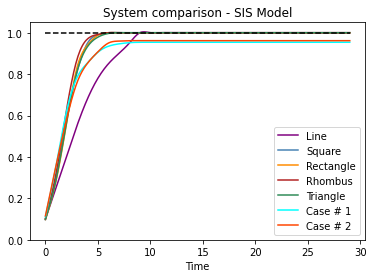

In [9]:
SISL  = models("sis",0.2,0.5,L,Moore).mediumCurves(0.1,30,10)[0]
SISC  = models("sis",0.2,0.5,C,Moore).mediumCurves(0.1,30,10)[0]
SISR1 = models("sis",0.2,0.5,R1,Moore).mediumCurves(0.1,30,10)[0]
SISR2 = models("sis",0.2,0.5,R2,Moore).mediumCurves(0.1,30,10)[0]
SIST  = models("sis",0.2,0.5,T,Moore).mediumCurves(0.1,30,10)[0]
SISC1 = models("sis",0.2,0.5,C1,Moore).mediumCurves(0.1,30,10)[0]
SISC2 = models("sis",0.2,0.5,C2,Moore).mediumCurves(0.1,30,10)[0]

var_sis = [SISL[1], SISC[1], SISR1[1], SISR2[1], SIST[1], SISC1[1], SISC2[1]]
col = ["purple", "steelblue", "darkorange", "firebrick", "seagreen", "cyan", "orangered"]
eti = ["Line", "Square", "Rectangle", "Rhombus", "Triangle", "Case # 1", "Case # 2"]
graficas(var_sis,eti,col,"System comparison - SIS Model")

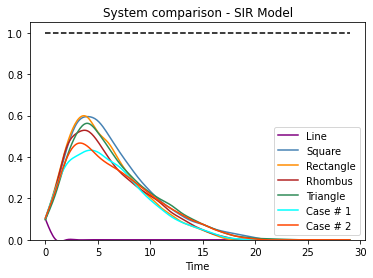

In [10]:
SIRL  = models("sir",0.2,0.5,L,Moore).mediumCurves(0.1,30,10)[0]
SIRC  = models("sir",0.2,0.5,C,Moore).mediumCurves(0.1,30,10)[0]
SIRR1 = models("sir",0.2,0.5,R1,Moore).mediumCurves(0.1,30,10)[0]
SIRR2 = models("sir",0.2,0.5,R2,Moore).mediumCurves(0.1,30,10)[0]
SIRT  = models("sir",0.2,0.5,T,Moore).mediumCurves(0.1,30,10)[0]
SIRC1 = models("sir",0.2,0.5,C1,Moore).mediumCurves(0.1,30,10)[0]
SIRC2 = models("sir",0.2,0.5,C2,Moore).mediumCurves(0.1,30,10)[0]

var_sir=[SIRL[1], SIRC[1], SIRR1[1], SIRR2[1], SIRT[1], SIRC1[1],SIRC2[1]]
graficas(var_sir,eti,col,"System comparison - SIR Model")